In [1]:
import threeplayers as ppp
import twoplayers as pp

import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from numba import jit
import numba as nb
from IPython.display import clear_output
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter

In [2]:
def plot_complicity():
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    N = 100
    prices = np.linspace(0, 1, 49)
    num_calcs = int(T/12500-1)
    summed_avg_profitabilities_three = np.zeros(num_calcs)
    summed_avg_profitabilities_two = np.zeros(num_calcs)

    for n in range(0, N):
        p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
        per_firm_profit = np.sum([avg_profs1, avg_profs2, avg_profs3], axis=0)/3
        summed_avg_profitabilities_three = np.sum([summed_avg_profitabilities_three, per_firm_profit], axis=0)

        p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
        per_firm_profit = np.sum([avg_profs1, avg_profs2], axis=0)/2
        summed_avg_profitabilities_two = np.sum([summed_avg_profitabilities_two, per_firm_profit], axis=0)

    avg_avg_profitabilities_three = np.divide(summed_avg_profitabilities_three, N)
    avg_complicities_three = np.divide(avg_avg_profitabilities_three, 0.08333)

    avg_avg_profitabilities_two = np.divide(summed_avg_profitabilities_two, N)
    avg_complicities_two = np.divide(avg_avg_profitabilities_two, 0.125) 

    fig, axs = plt.subplots(1)
    fig.suptitle("Average per-firm complicity in 100 different simulations (500000 runs each)")
    fig.set_figheight(6)
    fig.set_figwidth(9)
    axs.set_xlabel("t")
    axs.set_ylabel("Complicity")
    axs.set_ylim(0, 1)
    xs = np.linspace(0, T, num_calcs)
    axs.plot(xs, avg_complicities_three, color="grey", label = "average complicity, three players", marker='o')
    axs.plot(xs, avg_complicities_two, color="black", label = "average complicity, two players", marker='o')
    #axs.plot(xs, [0.08333]*len(xs), color='orange', label='joint-profit maximizing', linestyle='dashed')
    axs.plot(xs, [0.033/0.08333]*len(xs), color='grey', label='competitive benchmark, three players', linestyle='dashed')
    axs.plot(xs, [0.0611/0.125]*len(xs), color='black', label='competitive benchmark, two players', linestyle='dashed')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    #axs.xaxis.set_major_locator(ticker.MultipleLocator(1))
    #axs.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    #fig.tight_layout()
    plt.legend(loc='lower right')
    #plt.show()
    plt.savefig("complicity_number_of_firms.png")

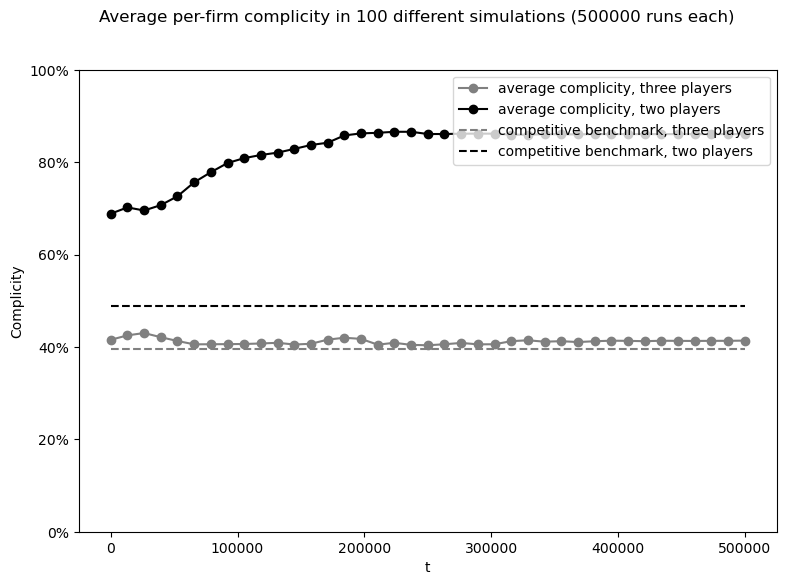

In [3]:
plot_complicity()

In [4]:
# ## useless plots, we will not use these
# alpha, delta = 0.3, 0.95  # values from Klein(2021)
# T = 500000
# N = 10
# prices = np.linspace(0, 1, 7)
# num_calcs = int(T/12500-1)
# variances2 = np.zeros(num_calcs)
# variances3 = np.zeros(num_calcs)
# fig, axs = plt.subplots(N, figsize=(8,29))
# for n in range(0, N):
#     p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
#     
#     # compute rolling avg price variance over time
#     for i in range(0, T, 12500):
#         if i >= 12500:
#             var0 = np.var(p_table[0, i-1000:i])
#             var1 = np.var(p_table[1, i-1000:i])
#             avg_var = np.mean([var0, var1])
#             variances2[int(i/12500)-1] = avg_var
#         else:
#             pass
#     p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
#     for i in range(0, T, 12500):
#         if i >= 12500:
#             var0 = np.var(p_table[0, i-1000:i])
#             var1 = np.var(p_table[1, i-1000:i])
#             var2 = np.var(p_table[2, i-1000:i])
#             avg_var = np.mean([var0, var1, var2])
#             variances3[int(i/12500)-1] = avg_var
#         else:
#             pass
#     fig.suptitle("Average variance in price over time")
#     #fig.set_figheight(6)
#     #fig.set_figwidth(9)
#     axs[n].set_xlabel("t")
#     axs[n].set_ylabel("Price variance")
#     xs = np.linspace(0, T, num_calcs)
#     axs[n].plot(xs, variances2, color="grey", label = "two players", marker='o')
#     axs[n].plot(xs, variances3, color="black", label = "three players", marker='o')
#     axs[n].legend(loc='upper right')
# fig.tight_layout()
# plt.show()

In [5]:
# alpha, delta = 0.3, 0.95  # values from Klein(2021)
# T = 500000
# N = 100
# prices = np.linspace(0, 1, 7)
# num_calcs = int(T/12500-1)
# 
# cycle2 = 0
# fixed2 = 0
# cycle3 = 0
# fixed3 = 0
# 
# 
# for n in range(0, N):
#     p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
# 
#     var0 = np.var(p_table[0, -1000:])
#     var1 = np.var(p_table[1, -1000:])
#     avg_var = np.mean([var0, var1])
#     if abs(avg_var - 0) < 0.01:
#         fixed2 += 1
#     else:
#         cycle2 += 1
#         
#     p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
# 
#     var0 = np.var(p_table[0, -1000:])
#     var1 = np.var(p_table[1, -1000:])
#     var2 = np.var(p_table[2, -1000:])
#     avg_var = np.mean([var0, var1, var2])
#     if abs(avg_var - 0) < 0.01:
#         fixed3 += 1
#     else:
#         cycle3 += 1
# 
# fig, axs = plt.subplots(2)
# fig.suptitle("End-game strategy outcomes")
# strats = ['fixed price','price cycling']
# outcomes = [fixed2, cycle2]
# axs[0].set_xlabel("Strategy outcome, two players")
# axs[0].set_ylabel("Frequency")
# axs[0].bar(strats, outcomes)
# #axs[0].legend(loc='upper right')
# 
# outcomes = [fixed3, cycle3]
# axs[1].set_xlabel("Strategy outcome, three players")
# axs[1].set_ylabel("Frequency")
# axs[1].bar(strats, outcomes)
# #axs[1].legend(loc='upper right')
# fig.tight_layout()
# plt.show()

In [6]:
# # FORCED DEVIATION 2 PLAYERS
# alpha, delta = 0.3, 0.95  # values from Klein(2021)
# T = 500000
# N = 1000
# prices = np.linspace(0, 1, 7)
# 
# avg_p_0s = np.zeros(20)
# avg_p_1s = np.zeros(20)
# avg_prof0s = np.zeros(20)
# avg_prof1s = np.zeros(20)
# ctr = 0 # counts number of fixed-price strategy runs
# for n in range(0, N):
#     p_table, avg_profs0, avg_profs1 = pp.bertrand_simulation_forced_deviation(alpha, delta, T, prices)
#     lastps0 = p_table[0, -1000:]
#     lastps1 = p_table[1, -1000:]
#     var0 = np.var(lastps0[900:])
#     var1 = np.var(lastps1[900:])
#     avg_var = np.mean([var0, var1])
#     
#     if abs(avg_var - 0) > 0.01: 
#         """
#         If the variance in the prices prior to the deviation was too high, we were in a price cycle,
#         but since we only want to observe fixed price strategy deviations, we must discard this run.
#         """
#         continue
#     p_0s = p_table[0, 499895:499915] # firm 0 prices before and after deviation
#     p_1s = p_table[1, 499895:499915] # firm 1 prices before and after deviation
#     # compute profits for each price
#     prof0s = [pp.profit(p0t, p1t) for p0t, p1t in zip(p_0s, p_1s)]
#     prof1s = [pp.profit(p1t, p0t) for p0t, p1t in zip(p_0s, p_1s)]
#     
#     avg_p_0s = np.sum([avg_p_0s, p_0s], axis = 0)
#     avg_p_1s = np.sum([avg_p_1s, p_1s], axis = 0)
#     
#     avg_prof0s = np.sum([avg_prof0s, prof0s], axis = 0)
#     avg_prof1s = np.sum([avg_prof1s, prof1s], axis = 0)
#     
#     ctr += 1
# # divide all price and profits arrays by number of fixed-price strategy runs
# avg_p_0s = np.divide(avg_p_0s, ctr)
# avg_p_1s = np.divide(avg_p_1s, ctr)
# avg_prof0s = np.divide(avg_prof0s, ctr)
# avg_prof1s = np.divide(avg_prof1s, ctr)
# 
# fig, axs = plt.subplots(2)
# fig.suptitle("Average price and profit after forced deviation (%s runs)"%ctr)
# 
# avg_p_0s = np.delete(avg_p_0s, np.arange(0, avg_p_0s.size, 2))[:-1]
# avg_p_1s = np.delete(avg_p_1s, np.arange(1, avg_p_1s.size, 2))[:-1]
# 
# axs[0].set_xlabel("t")
# axs[0].set_ylabel("Avg. price")
# axs[0].plot(range(-4, 14, 2), avg_p_0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
# axs[0].plot(range(-5, 13, 2), avg_p_1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
# axs[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
# axs[0].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
# axs[0].legend()
# 
# # reduce profit arrays into two-period profits
# avg_prof0s = np.add.reduceat(avg_prof0s, np.arange(0, avg_prof0s.size, 2))[:-1]
# avg_prof1s = np.add.reduceat(avg_prof1s, np.arange(1, avg_prof1s.size, 2))[:-1]
# 
# axs[1].set_xlabel("t")
# axs[1].set_ylabel("Avg. two-period profit")
# axs[1].plot(range(-4, 14, 2), avg_prof0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
# axs[1].plot(range(-5, 13, 2), avg_prof1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
# axs[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
# axs[1].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
# axs[1].legend()
# 
# fig.tight_layout()
# #plt.show()
# plt.savefig("forced_deviation.png")

In [7]:
# # FORCED DEVIATION 3 PLAYERS
# """
# Important note:
# Since the fixed-price strategy prices are substantially lower in the 3 player game,
# the deviator firm would set price=0, which would be an irrational price to set,
# as there is no profit to be gained. To fix this, we need a finer price grid, but this again
# muddies the comparison between the 2- and 3-player game. We should discuss this in the report.
# """
# 
# 
# alpha, delta = 0.3, 0.95  # values from Klein(2021)
# T = 500000
# N = 10
# 
# prices = np.linspace(0, 1, 7)
# #prices = np.insert(prices, 1, 0.005)
# avg_p_0s = np.zeros(21)
# avg_p_1s = np.zeros(21)
# avg_p_2s = np.zeros(21)
# 
# avg_prof0s = np.zeros(21)
# avg_prof1s = np.zeros(21)
# avg_prof2s = np.zeros(21)
# 
# ctr = 0 # counts number of fixed-price strategy runs
# for n in range(0, N):
#     p_table, avg_profs0, avg_profs1, avg_profs2 = ppp.bertrand_simulation_forced_deviation(alpha, delta, T, prices)
#     
#     lastps0 = p_table[0, -1000:]
#     lastps1 = p_table[1, -1000:]
#     lastps2 = p_table[2, -1000:]
#     
#     if not (np.array_equal(lastps0[:800], lastps1[:800]) and np.array_equal(lastps1[:800], lastps2[:800])):
#         print("prices were not coordinated")
#         continue
# 
#     p_0s = p_table[0, 499893:499914] # firm 0 prices before and after deviation
#     p_1s = p_table[1, 499893:499914] # firm 1 prices before and after deviation
#     p_2s = p_table[2, 499893:499914] # firm 2 prices
#     # compute profits for each price
#     prof0s = [ppp.profit(p0t, p1t, p2t) for p0t, p1t, p2t in zip(p_0s, p_1s, p_2s)]
#     prof1s = [ppp.profit(p1t, p2t, p0t) for p0t, p1t, p2t in zip(p_0s, p_1s, p_2s)]
#     prof2s = [ppp.profit(p2t, p0t, p1t) for p0t, p1t, p2t in zip(p_0s, p_1s, p_2s)]
#     
#     avg_p_0s = np.sum([avg_p_0s, p_0s], axis = 0)
#     avg_p_1s = np.sum([avg_p_1s, p_1s], axis = 0)
#     avg_p_2s = np.sum([avg_p_2s, p_2s], axis = 0)
#     
#     avg_prof0s = np.sum([avg_prof0s, prof0s], axis = 0)
#     avg_prof1s = np.sum([avg_prof1s, prof1s], axis = 0)
#     avg_prof2s = np.sum([avg_prof2s, prof2s], axis = 0)
#     
#     ctr += 1
# if ctr != 0:   
#     # divide all price and profits arrays by number of fixed-price strategy runs
#     avg_p_0s = np.divide(avg_p_0s, ctr)
#     avg_p_1s = np.divide(avg_p_1s, ctr)
#     avg_p_2s = np.divide(avg_p_2s, ctr)
#     avg_prof0s = np.divide(avg_prof0s, ctr)
#     avg_prof1s = np.divide(avg_prof1s, ctr)
#     avg_prof2s = np.divide(avg_prof2s, ctr)
# else:
#     print("Error! there were no fixed price strategy runs")
#     
# fig, axs = plt.subplots(2, figsize=(10, 4))
# fig.suptitle("Average price and profit after forced deviation (%s runs)"%ctr)
# 
# #avg_p_0s = np.delete(avg_p_0s, np.arange(0, avg_p_0s.size, 3))[:-1]
# #avg_p_1s = np.delete(avg_p_1s, np.arange(1, avg_p_1s.size, 3))[:-1]
# #avg_p_2s = np.delete(avg_p_2s, np.arange(2, avg_p_2s.size, 3))[:-1]
# 
# print("avg_p_0s:")
# print(avg_p_0s)
# print("avg_p_1s:")
# print(avg_p_1s)
# print("avg_p_2s:")
# print(avg_p_2s)
# 
# avg_p_0s = avg_p_0s[np.arange(0, avg_p_0s.size, 3)]
# avg_p_1s = avg_p_1s[np.arange(1, avg_p_1s.size, 3)]
# avg_p_2s = avg_p_2s[np.arange(2, avg_p_2s.size, 3)]
# 
# avg_p_0s = avg_p_0s#[:-1]
# avg_p_1s = avg_p_1s#[:-1]
# avg_p_2s = avg_p_2s#[:-1]
# 
# axs[0].set_xlabel("t")
# axs[0].set_ylabel("Avg. price")
# #axs[0].plot(range(-3, 15, 3), avg_p_0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
# #axs[0].plot(range(-5, 13, 3), avg_p_1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
# #axs[0].plot(range(-4, 14, 3), avg_p_2s, label="Firm 2", color = "green", marker="s", linestyle="dotted")
# axs[0].plot(range(893, 912, 3), avg_p_0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
# axs[0].plot(range(894, 913, 3), avg_p_1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
# axs[0].plot(range(895, 914, 3), avg_p_2s, label="Firm 2", color = "green", marker="s", linestyle="dotted")
# 
# 
# axs[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
# axs[0].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
# axs[0].legend()
# 
# ## reduce profit arrays into three-period profits
# #print("prof0s:")
# #print(avg_prof0s)
# #print("prof1s:")
# #print(avg_prof1s)
# #print("prof2s: ")
# #print(avg_prof2s)
# 
# avg_prof0s = np.add.reduceat(avg_prof0s, np.arange(0, avg_prof0s.size, 3))#[:-1]
# avg_prof1s = np.add.reduceat(avg_prof1s, np.arange(0, avg_prof1s.size, 3))#[:-1]
# avg_prof2s = np.add.reduceat(avg_prof2s, np.arange(0, avg_prof2s.size, 3))#[:-1]
# 
# axs[1].set_xlabel("t")
# axs[1].set_ylabel("Avg. three-period profit")
# #axs[1].plot(range(-3, 15, 3), avg_prof0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
# #axs[1].plot(range(-5, 13, 3), avg_prof1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
# #axs[1].plot(range(-4, 14, 3), avg_prof2s, label="Firm 2", color = "green", marker="s", linestyle="dotted")
# 
# #print(avg_prof0s)
# #print(avg_prof1s)
# #print(avg_prof2s)
# 
# axs[1].plot(range(893, 912, 3), avg_prof0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
# axs[1].plot(range(894, 913, 3), avg_prof1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
# axs[1].plot(range(895, 914, 3), avg_prof2s, label="Firm 2", color = "green", marker="s", linestyle="dotted")
# 
# axs[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
# axs[1].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
# axs[1].legend()
# 
# fig.tight_layout()
# plt.show()
# #plt.savefig("forced_deviation3.png")